# GOE: Gaussian orthogonal ensembles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA

In [4]:
def vapGoe(n):
    a =  np.random.normal(0, 1, (n,n))
    a = 1/2*(a+a.T)
    return LA.eigvalsh(a)

In [9]:
% time vapGoe(1000)[-1]

CPU times: user 529 ms, sys: 165 ms, total: 694 ms
Wall time: 146 ms


44.50018133927161

## Medida espectral y la ley del semicirculo

In [10]:
nsmp = 20000 
a = np.array([eivGoe(10) for n in range(nsmp)])
z = a.flatten()
 

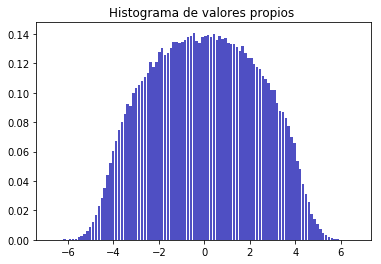

In [11]:
plt.hist(z, bins= 'auto', color='#0504aa',density=True,
                            alpha=0.7, rwidth=0.85) 
plt.title("Histograma de valores propios ") 
plt.show()

## Wigner's surmise

In [50]:
def distM(x):
    n = len(x)
    return x[n-1]-x[n-2]
     

In [56]:
nsmp = 5000
b = np.array([ distM(vapGoe(2))  for n in range(nsmp)])

In [57]:
x = np.linspace(0, 6, 100)
y = x/2*np.exp(-x*x/4)

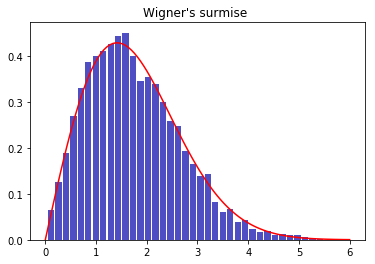

In [58]:
plt.hist(b, bins= 'auto', color='#0504aa',density=True,alpha=0.7, rwidth=0.85) 
plt.plot(x,y, color = 'red')                           
plt.title("Wigner's surmise ") 
plt.show()

In [62]:
nsmp = 50000
b = np.array([vapGoe(2)  for n in range(nsmp)])
x = b.T[0]
y = b.T[1]

In [63]:
t = np.linspace(-3, 3, 100)

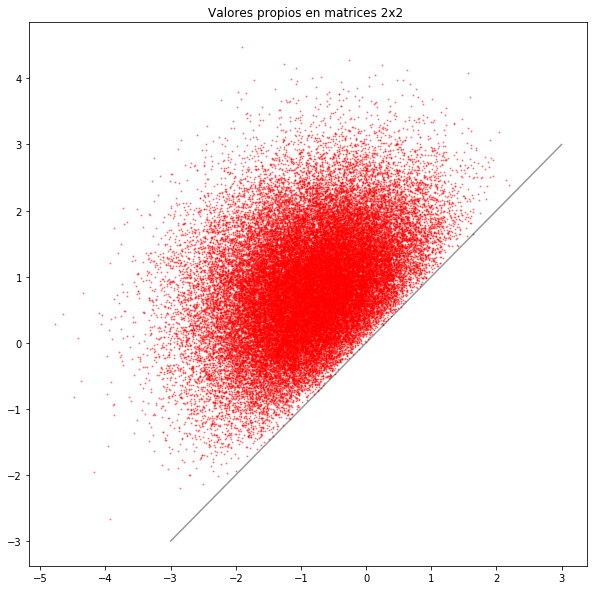

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(t,t, color = 'black', alpha = 0.4)   
ax.scatter(x,y, color = 'red', s = 1.0, alpha = 0.4)   
#ax.imshow(b, cmap='hot', interpolation='nearest')
plt.title("Valores propios en matrices 2x2 ") 
plt.show()

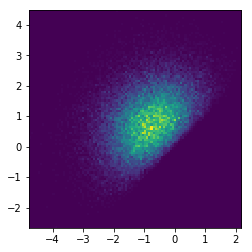

In [68]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

/home/jaime/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


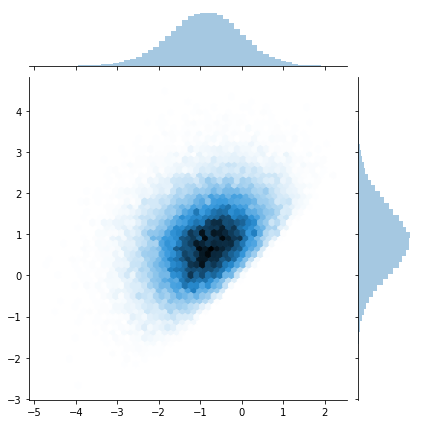

In [69]:
sns.jointplot(x=x, y=y, kind='hex')
plt.show()